### Define functions

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Nonlinear ODE
def f(t,x):
  return x**2

# Carleman linear ODE
def f_carleman(t, z, N):
  A = np.zeros((N, N))

  for i in range(N-1):
    A[i, i+1] = i+1

  return A@z

# Analytical solution
def ana_x(t, x0):
  return -1/(t-1/x0)

def ana_carleman(t, x0, N):
  tot = 0
  for i in range(1,N+1):
    tot += x0**i * t**(i-1)
  return tot


### Solve IVP

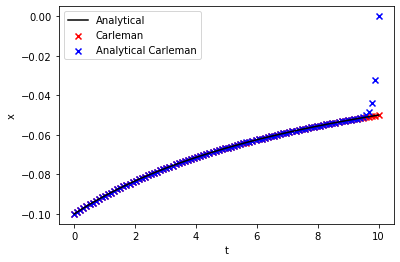

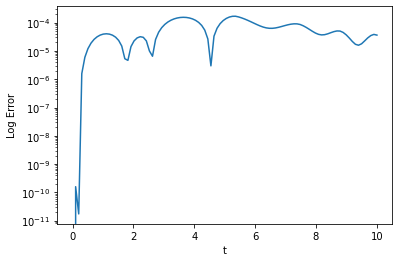

In [20]:
# Set time
t0 = 0
t_fin = 10
t = np.linspace(t0, t_fin, 100)

x0 = -0.1


# Solve nonlinear ODE
sol_nonlinear = solve_ivp(f, [t0, t_fin], [x0], t_eval=t)

# Solve Carleman linear ODE
N = 100
x0_carleman = np.array([x0**i for i in range(1,N+1)])
sol_carleman = solve_ivp(f_carleman, [t0, t_fin], x0_carleman, t_eval=t, args=(N,))

# Plot
tlim = 100
#plt.plot(t[:tlim], sol_nonlinear.y[0][:tlim], label='Nonlinear', color='black')
plt.plot(t[:tlim], ana_x(t, x0)[:tlim], label='Analytical', color='black')
plt.scatter(t[:tlim], sol_carleman.y[0][:tlim], label='Carleman', marker='x', color='red')
plt.scatter(t[:tlim], ana_carleman(t, x0, N)[:tlim], label='Analytical Carleman', marker='x', color='blue')
#plt.xlim([0, 10])
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.savefig('plots/ana_vs_carl.pdf')
plt.show()

# Error
error = abs(sol_carleman.y[0] - ana_x(t, x0))/abs(ana_x(t, x0))

plt.plot(t, error)
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('Log Error')
plt.savefig('plots/single_error.pdf')
plt.show()

### Convergence testing

[1.0, 1.0000000000000002, 0.9999999999999978, 0.9999999999999998, 0.9999999999999972, 0.9999999999999998, 1.0006583105105318, 1.001200753952672, 1.0014999432134413, 1.0009344607846509, 0.9969545007811667, 0.9779344780249716, 0.9504720629984553, 0.91271154458002, 0.8584281824937736, 0.7919003510081115, 0.8038194122324432, 0.7837186597824211, 0.7093813791604092, 0.6330081488060432, 0.515384419527409, 0.4066584610862368, 0.3326829384866775, 0.22659599644438352, 0.16641150478493086, 0.11429148083145005, 0.07751640956347158, 0.04918544269919972, 0.028571485412934305]


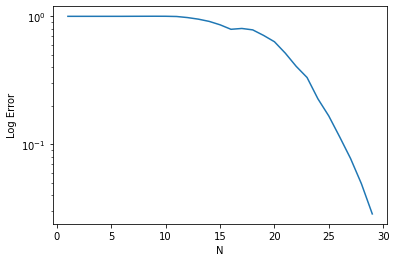

In [15]:
# Solve Carleman linear ODE with different N
def solve_carleman(t, x0, N):
  x0_carleman = np.array([x0**i for i in range(1,N+1)])
  sol_carleman = solve_ivp(f_carleman, [t0, t_fin], x0_carleman, t_eval=t, args=(N,))
  return sol_carleman.y[0]

N = [i for i in range(1, 30)]

error = []

for i in N:
  error.append(max(abs(solve_carleman(t, x0, i) - ana_x(t, x0))/abs(ana_x(t, x0))))

print(error)
plt.plot(N, error, label='N=1')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Log Error')
plt.savefig('plots/convergence_carl.pdf')
plt.show()